# Advanced lane finding project

#### Necessary imports

In [1]:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from moviepy.editor import VideoFileClip
%matplotlib inline



images = glob.glob('ChessboardImages/calibration*.jpg')

### Section 1 
#### Camera calibration

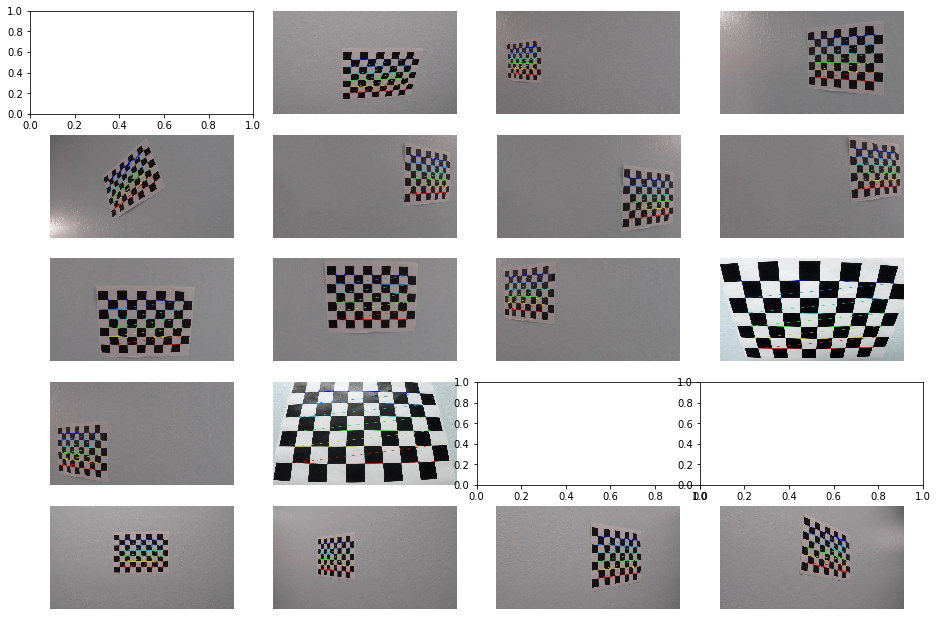

In [2]:

objpoints = [] # Object points list for object scale
imgpoints = [] # Image point list for image scale

nx = 9; ny = 6 # Number of inside corners in x and y directions

objp = np.zeros((nx*ny,3),np.float32) # objp gets the detected points. Initialized with all zeros

objp[:, :2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2) # rehsape objp in desired dimensions
fig, axs = plt.subplots(5,4, figsize=(16, 11))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i, iname in enumerate(images):
    img = cv2.imread(iname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Covert each image to gray first because corner finding function works on gray images.     

    ret,corners = cv2.findChessboardCorners(gray, (nx,ny), None) # ret is a boolean var for detection status

    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)
        Cimg = cv2.drawChessboardCorners(img, (nx,ny),corners, ret)
        axs[i].axis('off')
        axs[i].imshow(Cimg)

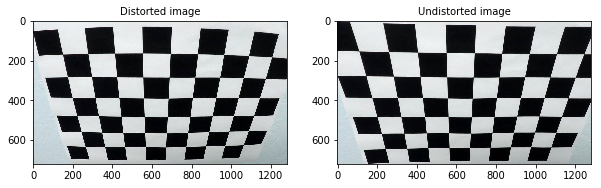

In [3]:

d_img = cv2.imread('DistortionCorrection/D_img.jpg') # read in the distorted image

img_size = (d_img.shape[1],d_img.shape[0])

# Calibrate camera using the obtained object and image points using the following cv2 function
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)

# Undistort image using above obtained undistortion parameters
ud_image = cv2.undistort(d_img, mtx, dist, None, mtx)

cv2.imwrite('./Submisson/OutputImages/DistortionCorrection/UD_img.jpg',ud_image)

# Also undistort one of the test images.
testImageDistorted = cv2.imread('./DistortionCorrection/testImageDistorted.jpg')
UD_testImage = cv2.undistort(testImageDistorted, mtx, dist, None, mtx)
cv2.imwrite('./DistortionCorrection/UD_testImage.jpg',UD_testImage)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(d_img)
ax1.set_title('Distorted image', fontsize=10)
ax2.imshow(ud_image)
ax2.set_title('Undistorted image', fontsize=10)
plt.show()

In [4]:
# Save camera parameters for later use
camera_par = {}
camera_par["mtx"] = mtx
camera_par["dist"] = dist
camera_par["rvecs"] = rvecs
camera_par["tvecs"] = tvecs
pickle.dump(camera_par, open("Cparameters.p","wb"))

### Section 2
#### Visualization of various color models

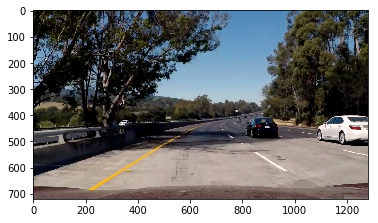

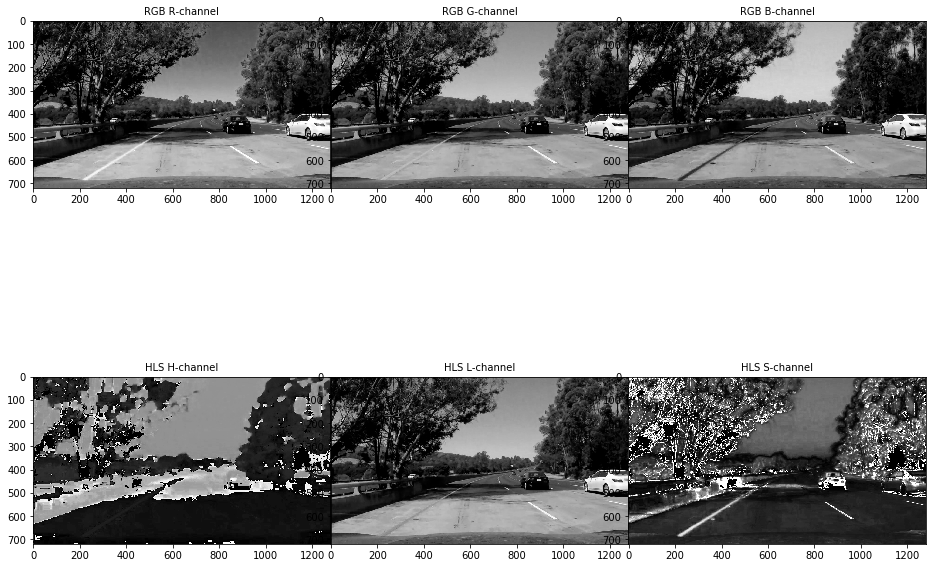

In [5]:
test_image = mpimg.imread('./pipelineGarage/testImage1.jpg')

# I am using mpimg.imread to get images in RGB format.
r = test_image[: , :, 0]
g = test_image[: , :, 1]
b = test_image[: , :, 2]

# Covert to HLS to get Hue, Saturation and Lightness channels separately.
hls = cv2.cvtColor(test_image, cv2.COLOR_RGB2HLS)
h = hls[: , :, 0]
l = hls[: , :, 1]
s = hls[: , :, 2]

# Display the original image first
plt.imshow(test_image)

# Display all the channels together
fig, axs = plt.subplots(2,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

axs[0].imshow(r, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=10)

axs[1].imshow(g, cmap='gray')
axs[1].set_title('RGB G-channel', fontsize=10)

axs[2].imshow(b, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=10)

axs[3].imshow(h, cmap='gray')
axs[3].set_title('HLS H-channel', fontsize=10)

axs[4].imshow(l, cmap='gray')
axs[4].set_title('HLS L-channel', fontsize=10)

axs[5].imshow(s, cmap='gray')
axs[5].set_title('HLS S-channel', fontsize=10)



#### Visualize color models on image with varying brightness

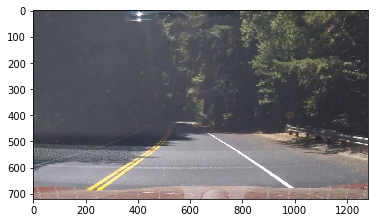

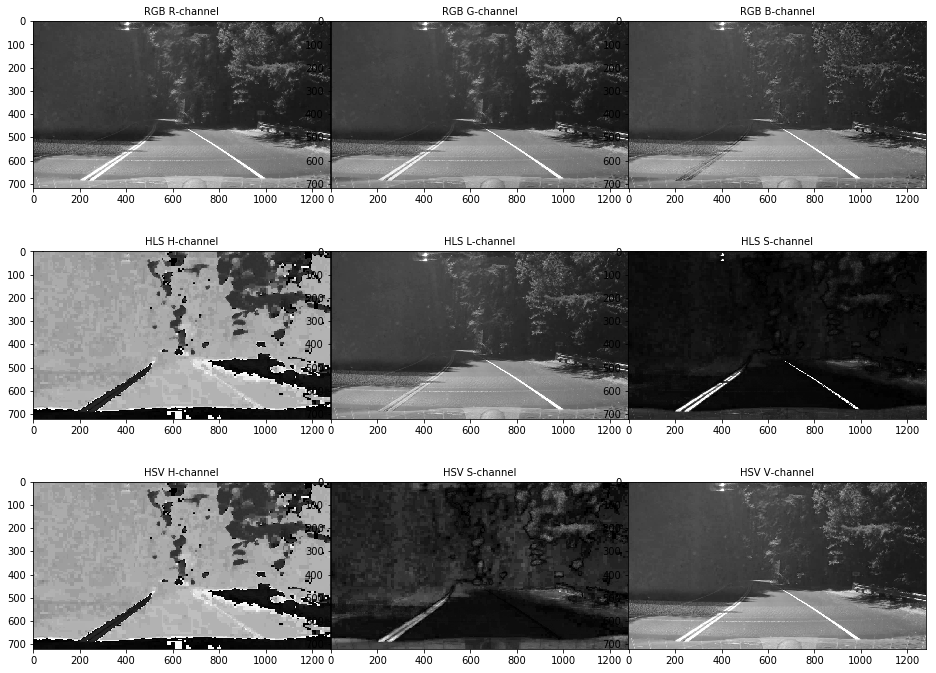

In [6]:
# Read image with varying lighting conditions in the image
test_image = mpimg.imread('./pipelineGarage/testImage5.jpg')

# Separate the RGB channels
r = test_image[: , :, 0]
g = test_image[: , :, 1]
b = test_image[: , :, 2]

# Separate the HLS channels
hls = cv2.cvtColor(test_image, cv2.COLOR_RGB2HLS)
h = hls[: , :, 0]
l = hls[: , :, 1]
s = hls[: , :, 2]

# Separate the HSV channels
HSV = cv2.cvtColor(test_image, cv2.COLOR_RGB2HSV)
H = HSV[: , :, 0]
S = HSV[: , :, 1]
V = HSV[: , :, 2]

# First display the original image
plt.imshow(test_image)


fig, axs = plt.subplots(3,3, figsize=(16, 12))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

axs[0].imshow(r, cmap='gray')
axs[0].set_title('RGB R-channel', fontsize=10)

axs[1].imshow(g, cmap='gray')
axs[1].set_title('RGB G-channel', fontsize=10)

axs[2].imshow(b, cmap='gray')
axs[2].set_title('RGB B-channel', fontsize=10)

axs[3].imshow(h, cmap='gray')
axs[3].set_title('HLS H-channel', fontsize=10)

axs[4].imshow(l, cmap='gray')
axs[4].set_title('HLS L-channel', fontsize=10)

axs[5].imshow(s, cmap='gray')
axs[5].set_title('HLS S-channel', fontsize=10)

axs[6].imshow(H, cmap='gray')
axs[6].set_title('HSV H-channel', fontsize=10)

axs[7].imshow(S, cmap='gray')
axs[7].set_title('HSV S-channel', fontsize=10)

axs[8].imshow(V, cmap='gray')
axs[8].set_title('HSV V-channel', fontsize=10)


#### Obseravations from color channel visualizations:
- R and G channels give bright reperesentation of white and yellow lane lines even in varying lighting conditions.
- G channel is blacked out for yellow lane lines.
- S channel gives best display of lane lines.
- L channel can be used to incorporate varying lighting information in our task.
- H channel also detects lane lines but in negative form. It can be used but we are not using it in this project.




### Section 3
#### Gradient and Direction thresholding

In [7]:
def sobel_x(img, low_th, high_th, kernel_size = 3):
    """
    Applies Sobel operator in x direction.
    """
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize = kernel_size)
    
    # Positive and negative slopes are treated the same way
    sobelx = np.absolute(sobelx)
    
    # Rescale the image to make the function return same format with different input formats
    sobelx = np.uint8(255 * sobelx/np.max(sobelx) )

    binary_op_g = np.zeros_like(sobelx)
    
    # Apply threshold on the image
    binary_op_g[(sobelx >= low_th) & (sobelx <= high_th)] = 1
    return binary_op_g



In [8]:
def dir_threshold(img,low_th = 0, high_th = np.pi/2, sobel_kernel=3,):
    """
    Calculates gradient direction throughoutthe image
    and returns binary image where direction condition is satisfied
    """    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1,0, ksize = sobel_kernel))
    sobely = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0,1, ksize = sobel_kernel))
    
    sobel_dir = np.arctan( sobely/sobelx )
    
    binary_output = np.zeros_like(sobel_dir)
    
    # Apply direction threshold
    binary_output[(sobel_dir >= low_th) & (sobel_dir <= high_th)] = 1
    return binary_output

#### Visualize gradient and threshold operators

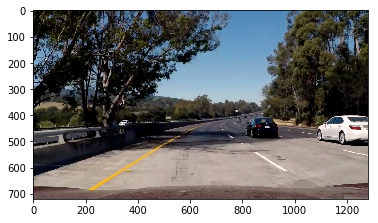

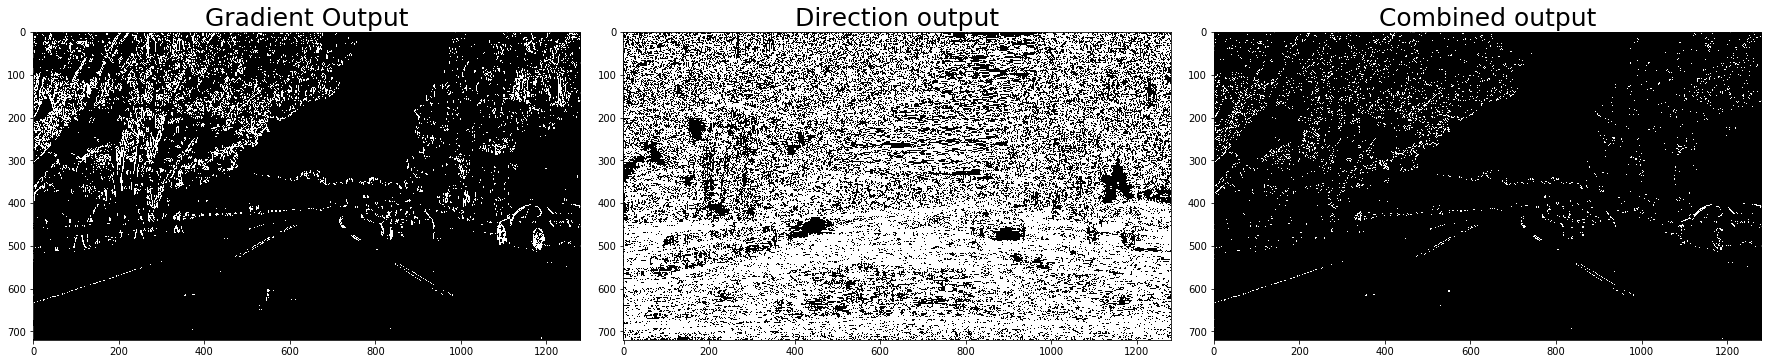

In [9]:
test_image = mpimg.imread('./pipelineGarage/testImage1.jpg')

# Get sobel output first
sobel_returned = sobel_x(test_image, 30, 200, 3)

# Get direction output
dir_returned = dir_threshold(test_image, np.pi/6, np.pi/2, 3)

# Image with both outputs combined
combined_image = np.zeros_like(sobel_returned)
combined_image[(sobel_returned==1) & (dir_returned==1)] = 1

# Display results separately and also their combination
plt.imshow(test_image)

f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
f.tight_layout()
ax1.imshow(sobel_returned, cmap = 'gray')
ax1.set_title('Gradient Output', fontsize=25)
ax2.imshow(dir_returned, cmap='gray')
ax2.set_title('Direction output', fontsize=25)
ax3.imshow(combined_image, cmap='gray')
ax3.set_title('Combined output', fontsize=25)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Section 4
#### Combining various thresholds to get best representation of lanes

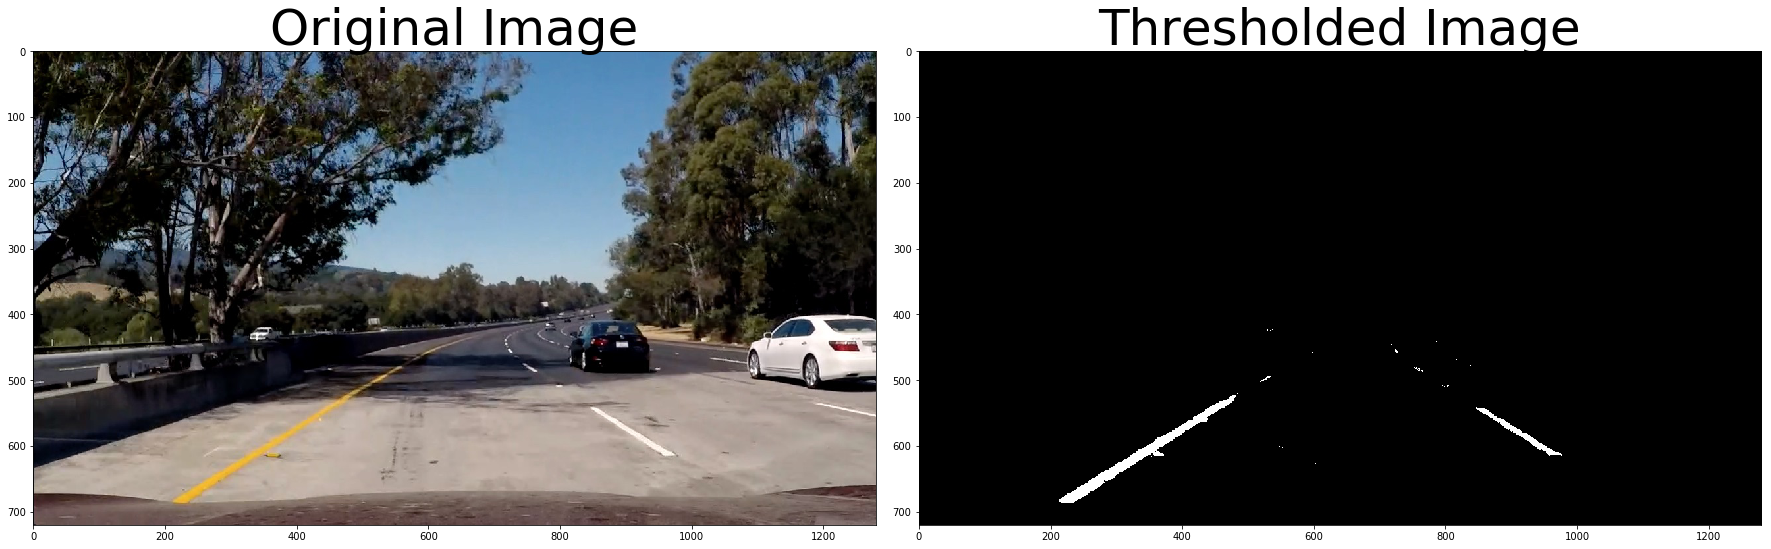

In [10]:
# Read in the image
image = mpimg.imread('./pipelineGarage/testImage1.jpg')

height, width = image.shape[:2]

# Sobel x gradient output
sobelx_binary = sobel_x(image, 30, 200)

# Direction output
dir_binary = dir_threshold(image, np.pi/6, np.pi/2)

# Combined condition for gradient and direction
combined_condition = ((sobelx_binary == 1) & (dir_binary == 1))

# Apply RG thresholds
rg_threshold = 150 # Threshold for R and G channels
R = image[:,:,0]
G = image[:,:,1]
r_g_condition = (R > rg_threshold) & (G > rg_threshold) # Combined conditon on R and G channels

# Apply LS thresholds
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
S = hls[:,:,2]
L = hls[:,:,1]
s_threshold = 100 
s_condition = S > s_threshold # Condition on S channel

l_threshold = 120
l_condition = L > l_threshold # Condition on L channel

color_combined = np.zeros_like(R)
color_combined[(r_g_condition & l_condition) & (s_condition | combined_condition)] = 1

# Mask the unnecessary portion of the image. Cropped image is a triangle with base on left and right bottom
# image corners and apex as the midpoint of the image
mask = np.zeros_like(color_combined)
region_of_interest_vertices = np.array([[0,height-1], [width/2, int(0.5*height)], [width-1, height-1]], dtype=np.int32)
cv2.fillPoly(mask, [region_of_interest_vertices], 1)
thresholded = cv2.bitwise_and(color_combined, mask)

# Display thresholding output
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(thresholded, cmap='gray')
ax2.set_title('Thresholded Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)



Inspired from: [Subodh Malgonde's implementation](https://github.com/subodh-malgonde/advanced-lane-finding)

### Section 5
#### Perspective transformation

In [11]:
def unwarp(img, src,dst):
    """
    Get perspective transfrom
    """
    imshape = img.shape
    M = cv2.getPerspectiveTransform(src, dst)
    
    M_inv = cv2.getPerspectiveTransform(dst, src)
    
    warped = cv2.warpPerspective(img, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)

    return warped, M, M_inv
    

#### Visualization of perspective transformation

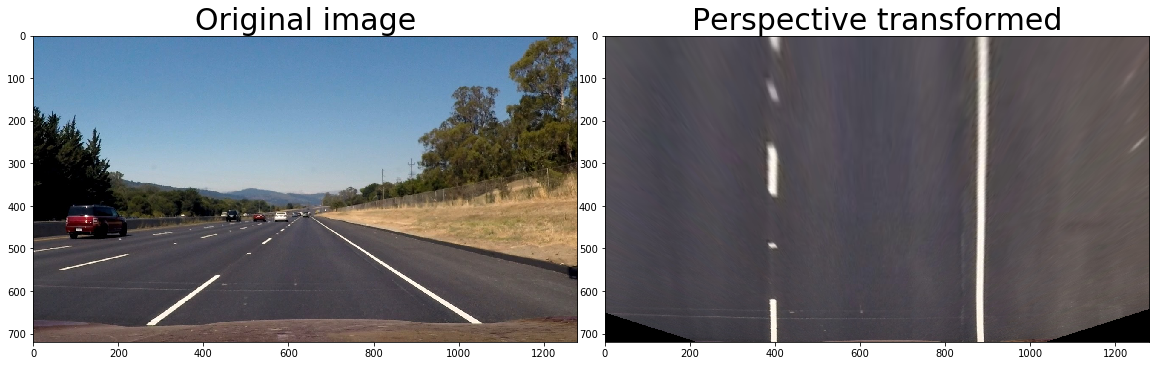

In [12]:
img = mpimg.imread('./pipelineGarage/testImage7.jpg')
h,w = img.shape[:2]

# Source points from the original image
src = np.float32([(286,675),(585,458), (700, 458), (1040,675)])

# Destination points where the source points should be mapped in the output image
dst = np.float32([(400,h),(400,0),(w-400, 0),(w-400, h)])

unwarped_image, M, Minv = unwarp(img, src,dst)

# Display the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.subplots_adjust(hspace = .2, wspace=.05)
ax1.imshow(img)
ax1.set_title('Original image', fontsize=30)
ax2.imshow(unwarped_image)
ax2.set_title('Perspective transformed', fontsize=30)

### Section 6
#### Combining everything together in a pipeline

In [13]:
def pipeline(image):
    # Undistort image
    ud_image = cv2.undistort(image, mtx, dist, None, mtx)
    
    # Get Sobel output
    sobelx_binary = sobel_x(ud_image, 30, 200)
    
    # Get direction output
    dir_binary = dir_threshold(ud_image, low_th = np.pi/6, high_th = np.pi/2)
    
    # Combine sobel and direction output
    combined_condition = ((sobelx_binary == 1) & (dir_binary == 1))
    
    # Set rg thresholds
    rg_threshold = 150
    R = image[:,:,0]
    G = image[:,:,1]
    r_g_condition = (R > rg_threshold) & (G > rg_threshold)

    # Set S and L thresholds
    hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    L = hls[:,:,1]
    s_threshold = (100, 255)
    s_condition = (S > s_threshold[0]) & (S <= s_threshold[1])

    l_threshold = (120, 255)
    l_condition = (L > l_threshold[0]) & (L <= l_threshold[1])

    # Combine all the binary image with the given condtion
    color_combined = np.zeros_like(R)
    color_combined[(r_g_condition & l_condition) & (s_condition | combined_condition)] = 1

    mask = np.zeros_like(color_combined)
    region_of_interest_vertices = np.array([[0,height-1], [width/2, int(0.5*height)], [width-1, height-1]], dtype=np.int32)
    cv2.fillPoly(mask, [region_of_interest_vertices], 1)
    thresholded = cv2.bitwise_and(color_combined, mask)
    
    # Finally unwarp the binary image
    unwarped, M, Minv = unwarp(thresholded, src,dst)
    
    return unwarped,Minv

#### Visualize pipeline on all the test images

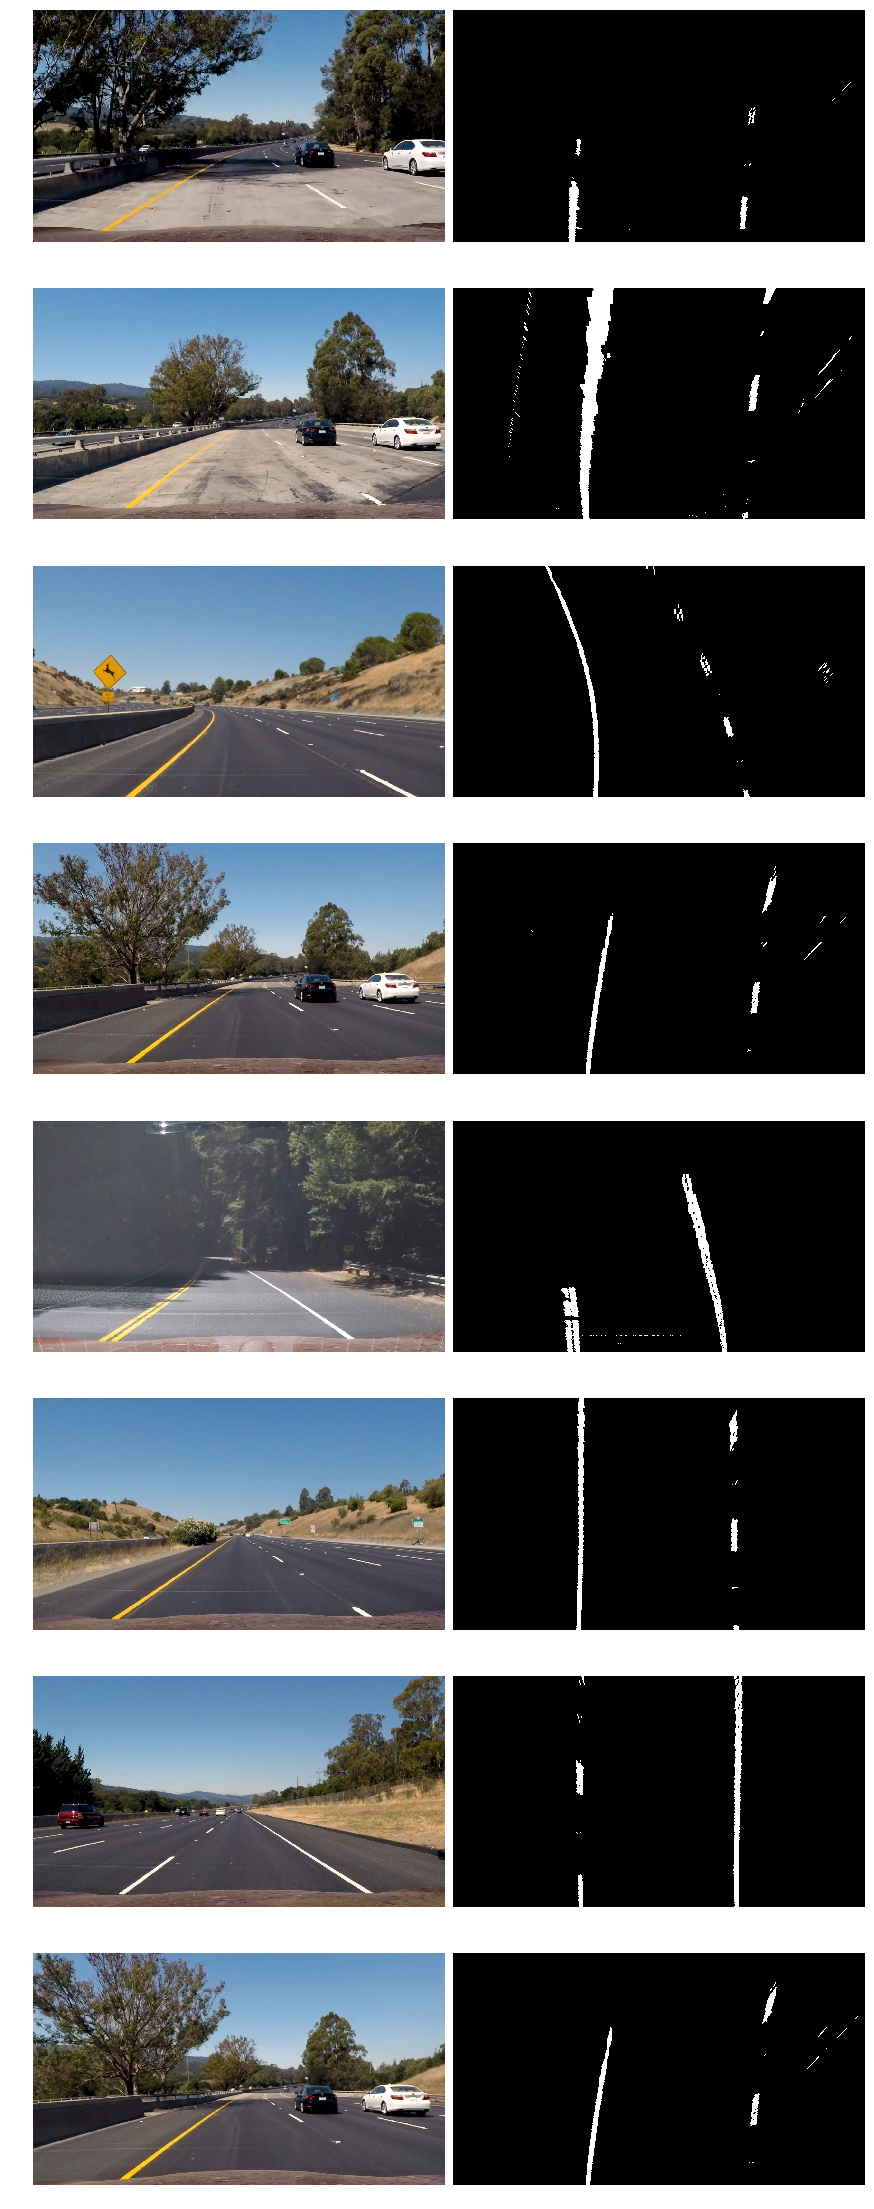

In [14]:
images = glob.glob('./pipelineGarage/*.jpg')
                                          
# Set up plot
fig, axs = plt.subplots(len(images),2, figsize=(15,40 ))
fig.subplots_adjust(hspace = .2, wspace=.005)
axs = axs.ravel()
                  
i = 0
for image in images:
    img = mpimg.imread(image)
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_bin, Minv = pipeline(img)
    axs[i].imshow(img)
    axs[i].axis('off')
    i += 1
    axs[i].imshow(img_bin, cmap='gray')
    axs[i].axis('off')
    i += 1

### Section 7
#### Detecting lane lines

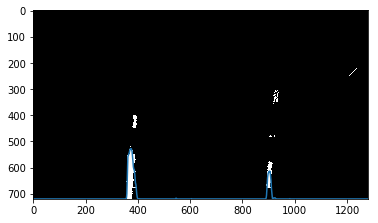

In [15]:
img = mpimg.imread('./pipelineGarage/testImage1.jpg')

binary_warped, Minv = pipeline(img) 
histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
plt.plot(binary_warped.shape[0] - histogram)
plt.imshow(binary_warped, cmap = 'gray')

# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255

# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
midpoint = np.int(histogram.shape[0]//2)
leftx_base = np.argmax(histogram[:midpoint])
rightx_base = np.argmax(histogram[midpoint:]) + midpoint

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0]/nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 100
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window+1)*window_height
    win_y_high = binary_warped.shape[0] - window*window_height
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img,(win_xleft_low,win_y_low),(win_xleft_high,win_y_high),
    (0,255,0), 2) 
    cv2.rectangle(out_img,(win_xright_low,win_y_low),(win_xright_high,win_y_high),
    (0,255,0), 2) 
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
    (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:        
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

# Concatenate the arrays of indices
left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds] 
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds] 

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

In [16]:
def sliding_window_search(img):
    """
    Applies the pipeline to given image and returns lane line parametrs.
    This is blind lane line detection using histogram technique.
    """    
    binary_warped, Minv = pipeline(img) 
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
       
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # Choose the number of sliding windows
    nwindows = 10
    # Set height of windows
    window_height = np.int(binary_warped.shape[0]/nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated for each window
    leftx_current = leftx_base
    rightx_current = rightx_base
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 30
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []
    rectangle_data = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        rectangle_data.append((win_y_low, win_y_high, win_xleft_low, win_xleft_high, win_xright_low, win_xright_high))
                
        # Identify the nonzero pixels in x and y within the window
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))
    
    # Concatenate the arrays of indices
    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds] 

    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    return left_fit, right_fit, left_lane_inds, right_lane_inds, rectangle_data

#### Test sliding_window_search()  function

(720, 0)

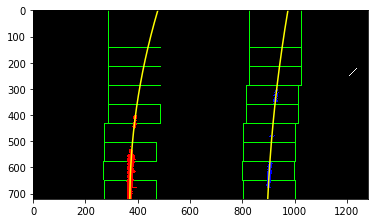

In [17]:

img = mpimg.imread('./pipelineGarage/testImage1.jpg')
binary_warped, Minv = pipeline(img)
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
left_fit, right_fit,_, __,  rectangle_data = sliding_window_search(img)

ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

for rect in rectangle_data:
# Draw the windows on the visualization image
    cv2.rectangle(out_img,(rect[2],rect[0]),(rect[3],rect[1]),(0,255,0), 2) 
    cv2.rectangle(out_img,(rect[4],rect[0]),(rect[5],rect[1]),(0,255,0), 2) 

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [18]:
def search_using_previous_fit(img, left_fit, right_fit):
    """
    Search lane line in the frame using a previous fit.
    In this, blind search is not performed, rather, in a margin
    space around the previous fit.
    """
    binary_warped, Minv = pipeline(img)
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    margin = 100
    left_lane_inds = ((nonzerox > (left_fit[0]*(nonzeroy**2) + left_fit[1]*nonzeroy + 
    left_fit[2] - margin)) & (nonzerox < (left_fit[0]*(nonzeroy**2) + 
    left_fit[1]*nonzeroy + left_fit[2] + margin))) 

    right_lane_inds = ((nonzerox > (right_fit[0]*(nonzeroy**2) + right_fit[1]*nonzeroy + 
    right_fit[2] - margin)) & (nonzerox < (right_fit[0]*(nonzeroy**2) + 
    right_fit[1]*nonzeroy + right_fit[2] + margin)))  

    # Again, extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    # Fit a second order polynomial to each
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    
    return left_fit, right_fit, left_lane_inds, right_lane_inds

#### Test search_using_previous_fit()  function

(720, 0)

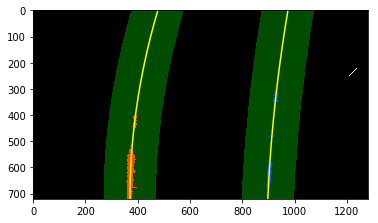

In [19]:
binary_warped, Minv = pipeline(img)

left_fit2, right_fit2, left_lane_inds, right_lane_inds = search_using_previous_fit(img, left_fit, right_fit)
    
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)

ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
left_fitx2 = left_fit2[0]*ploty**2 + left_fit2[1]*ploty + left_fit2[2]
right_fitx2 = right_fit2[0]*ploty**2 + right_fit2[1]*ploty + right_fit2[2]
# Color in left and right line pixels

nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                              ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                              ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
plt.imshow(result)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)

In [20]:
def draw_detected_lane(image, binary_image, left_fit, right_fit, Minv):
    """
    Display detected lane area as filled polygon using cv2.fillpoly.
    """    
    image_copy = np.copy(image)   
    h, w = binary_image.shape
    y_points = np.linspace(0, h-1, h)
    left_xfit = left_fit[0]*(y_points**2) + left_fit[1]*y_points + left_fit[2]
    right_xfit = right_fit[0]*(y_points**2) + right_fit[1]*y_points + right_fit[2]
    
    binary_temp = np.zeros_like(binary_image)
    stacked_binary = np.dstack((binary_temp, binary_temp, binary_temp))
    
    left_points = np.array([np.transpose(np.vstack([left_xfit, y_points]))])
    right_points = np.array([np.flipud(np.transpose(np.vstack([right_xfit, y_points])))])
    all_points = np.hstack((left_points, right_points))
    
    cv2.fillPoly(stacked_binary, np.int_([all_points]), (0,255, 0))
    cv2.polylines(stacked_binary, np.int32([left_points]), isClosed=False, color=(255,0,255), thickness=15)
    cv2.polylines(stacked_binary, np.int32([right_points]), isClosed=False, color=(0,255,255), thickness=15)
    
    camera_perspective = cv2.warpPerspective(stacked_binary, Minv, (w, h)) 
    
    final_image = cv2.addWeighted(image_copy, 1, camera_perspective, 0.3, 0)
    
    return final_image

#### Test draw_detected_lane( )  function

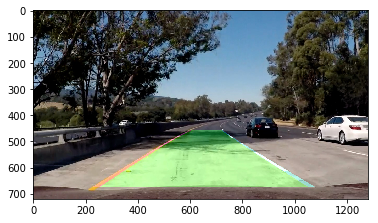

In [35]:
# Apply lane detection pipeline on the Undistorted test image
ud_image = mpimg.imread('./DistortionCorrection/UD_testImage.jpg')
image_with_lane = draw_detected_lane(img, binary_warped, left_fit, right_fit, Minv)
plt.imshow(image_with_lane)


In [25]:
def get_curvature_radius(binary_image, left_lane_indices, right_lane_indices):
    """
    Calculates curvature radius of left and right lane line
    and returns their average
    """
    # Relation between image and actual dimensions
    met_per_pix_y = 3.048/100 
    met_per_pix_x = 3.5/450 
    
    h = binary_image.shape[0]
    y_points = np.linspace(0, h-1, h)
    
    nonzero = binary_image.nonzero()
    nonzeroy = nonzero[0]
    nonzerox = nonzero[1]
    
    left_lane_x = nonzerox[left_lane_indices]
    right_lane_x = nonzerox[right_lane_indices]
    
    left_lane_y = nonzeroy[left_lane_indices]
    right_lane_y = nonzeroy[right_lane_indices]
    
    # Refit the lane indices with new scaling.
    left_fit_new = np.polyfit(left_lane_y * met_per_pix_y, left_lane_x * met_per_pix_x, 2)
    right_fit_new = np.polyfit(right_lane_y * met_per_pix_y, right_lane_x * met_per_pix_x, 2)
        
    left_curve_rad = ((1 + (2*left_fit_new[0]*np.max(y_points)*met_per_pix_y + left_fit_new[1])**2)**1.5) / np.absolute(2*left_fit_new[0])
    right_curve_rad = ((1 + (2*right_fit_new[0]*np.max(y_points)*met_per_pix_y + right_fit_new[1])**2)**1.5) / np.absolute(2*right_fit_new[0]) 
    
    # Left and right curvature radii are almost same for straight roads and even for 
    # curved roads, their mean is a good approximation of actual curvature.
    mean_curv_rad = (left_curve_rad + right_curve_rad)/2
    
    return mean_curv_rad
    
    

In [26]:
def get_distance_from_center(binary_image, left_fit, right_fit):
    """
    Calculate offset of vehicle from the center of the road
    """
    met_per_pix_x = 3.5/450
    h = binary_image.shape[0]
    # Car position is assumed to be in the center of the image which is a fair assumption
    # as camera is fitted in approx center of the car.
    car_position = binary_image.shape[1]/2
    
    # get x intercept using left and right fits
    left_corner = left_fit[0]*(h**2) + left_fit[1]*h + left_fit[2]
    right_corner = right_fit[0]*(h**2) + right_fit[1]*h + right_fit[2]
    
    # Lane center is in middle of these two intercepts
    lane_center = (left_corner + right_corner)/2
    distance_off_center = (car_position - lane_center) * met_per_pix_x
    
    return distance_off_center

#### Test get_distance_from_center( )  function

In [27]:
mean_rad = get_curvature_radius(binary_warped, left_lane_inds, right_lane_inds)
dist = get_distance_from_center(binary_warped, left_fit, right_fit)
print(mean_rad, dist)

496.983897216 0.0490765109156


In [28]:
def put_data_on_image(image, rad_of_curv, dist_from_center):
    """
    Display the curvature radius and center offset information on the frame
    """    
    image_copy = np.copy(image)
    h = image_copy.shape[0]
    text = 'Radius of Curvature: ' + '{:04.2f}'.format(rad_of_curv) + 'm'
    cv2.putText(image_copy,text, (40,70),cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    if dist_from_center > 0:
        direction = 'right'
    else:
        direction = 'left'
    text2 = 'Position : ' + direction + ' of center by ' + '{:04.3f}'.format(abs(dist_from_center)) + 'm'
    cv2.putText(image_copy, text2, (40,120), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 2 ,cv2.LINE_AA)
    return image_copy

#### Test put_data_on_image( ) function

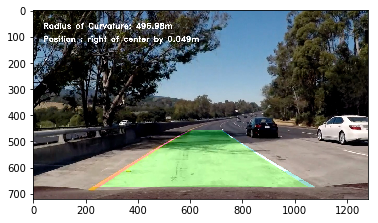

In [29]:
plt.imshow(put_data_on_image(image_with_lane,mean_rad,dist))

### Section 8
#### Implement above Lane line detection using CLASS 

In [30]:
# Define a class to receive the characteristics of each line detection
class Line():
    def __init__(self):
        # Is line detected?
        self.detected = False  
       
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        
        #polynomial coefficients for the most recent fit
        self.current_fit = []  
        
        #difference in fit coefficients between last and new fits
        self.diffs = np.array([0,0,0], dtype='float') 
        
        #number of detected pixels
        self.px_count = None
        
        # number of bad frames encountered
        self.num_bad_frames = 0
        
        # Maximum number of bad frames allowed
        self.max_bad_frames = 5
        
        self.last_fit = None
    def add_fit(self, fit):
        # add a found fit to the line
        if fit is not None:
            if self.best_fit is not None:
                # if we have a best fit, see how this new fit compares
                self.diffs = abs(fit-self.best_fit)
            if (self.diffs[0] > 0.001 or \
                self.diffs[1] > 1.0 or \
                self.diffs[2] > 100.) and \
                len(self.current_fit) > 0:
                # bad fit! abort! abort! ... well, unless there are no fits in the current_fit queue, then we'll take it                
                self.num_bad_frames += 1
                
                # If bad frame is detected for successive 5 frames, self.detected is made False and blind search is forced
                if self.num_bad_frames > self.max_bad_frames:
                    self.detected = False
            else:
                self.detected = True
                self.num_bad_frames = 0
                #self.px_count = np.count_nonzero(inds)
                self.current_fit.append(fit)
                if len(self.current_fit) > 5:
                    # throw out old fits, keep newest n
                    self.current_fit = self.current_fit[len(self.current_fit)-5:]
                self.best_fit = np.average(self.current_fit, axis=0)
                self.last_fit = self.best_fit
            # or remove one from the history, if not found
        else:
            
            
            if len(self.current_fit) > 0:
                # throw out oldest fit
                self.current_fit = self.current_fit[:len(self.current_fit)-1]
            if len(self.current_fit) > 0:
                # if there are still any fits in the queue, best_fit is their average
                self.best_fit = np.average(self.current_fit, axis=0)


In [31]:
def process_image(img):
    """
    Takes individual frames, process it, then performs sanity check.
    If the frame is good, it is accepted otherwise previous fit is used; but, only for
    a fixed number of times
    """    
    new_img = np.copy(img)
    img_bin, Minv = pipeline(new_img)
    
    # if both left and right lines were detected last frame, use polyfit_using_prev_fit, otherwise use sliding window
    if not l_line.detected or not r_line.detected:
        l_fit, r_fit,l_inds, r_inds, _ = sliding_window_search(img)
        
    else:
        l_fit, r_fit, l_inds, r_inds = search_using_previous_fit(img, l_line.best_fit, r_line.best_fit)
        
    # invalidate both fits if the difference in their x-intercepts isn't around 350 px (+/- 100 px)
    
    # Sanity check 1:
        # X intercept with previous and current fits should not differ much
    if l_fit is not None and r_fit is not None and l_line.best_fit is not None and r_line.best_fit is not None:
        # calculate x-intercepts (bottom of image, x=image_height) for fits
        h = img.shape[0]
        l_x_current = l_fit[0]*h**2 + l_fit[1]*h + l_fit[2]
        r_x_current = r_fit[0]*h**2 + r_fit[1]*h + r_fit[2]
        l_x_prev = l_line.best_fit[0]* h**2 + l_line.best_fit[1]*h + l_line.best_fit[2]
        r_x_prev = r_line.best_fit[0]* h**2 + r_line.best_fit[1]*h + r_line.best_fit[2]
        
        l_x_diff = abs(l_x_current - l_x_prev)
        r_x_diff = abs(r_x_current - r_x_prev)
        
        
        # Sanity check 2:
            # Number of detected pixels should be atleast 1500 for each lane. 
        if l_x_diff > 150 or r_x_diff > 150 or len(l_inds) < 1500 or len(r_inds) < 1500:
            l_fit = None
            r_fit = None
            
            
    l_line.add_fit(l_fit)
    r_line.add_fit(r_fit)
    
    # draw the current best fit if it exists
    if l_line.best_fit is not None and r_line.best_fit is not None:
        img_out1 = draw_detected_lane(new_img, img_bin, l_line.best_fit, r_line.best_fit, Minv)
        curv_rad = get_curvature_radius(img_bin, l_inds, r_inds)
        d_center = get_distance_from_center(img_bin, l_line.best_fit, r_line.best_fit)
        img_out = put_data_on_image(img_out1, curv_rad, d_center)
    else:
        img_out = new_img
        
    return img_out

    

Inspired from: [Jeremy shannon's implementation](https://github.com/jeremy-shannon/CarND-Advanced-Lane-Lines)

#### Test process_image( ) function 

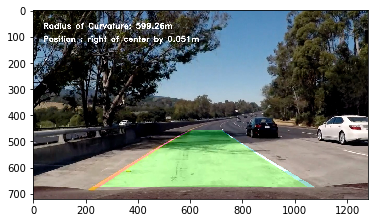

In [32]:
l_line = Line()
r_line = Line()
plt.imshow(process_image(mpimg.imread('./pipelineGarage/testImage1.jpg')))

In [34]:
l_line = Line()
r_line = Line()
#my_clip.write_gif('test.gif', fps=12)
video_output1 = 'project_video_output.mp4'
video_input1 = VideoFileClip('project_video.mp4')#.subclip(22,26)
processed_video = video_input1.fl_image(process_image)
%time processed_video.write_videofile(video_output1, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4


100%|█████████▉| 1260/1261 [05:03<00:00,  4.28it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 22min 46s, sys: 24.3 s, total: 23min 10s
Wall time: 5min 4s
